# U.S. Medical Insurance Costs
## Aim
The aim of this project is to explore the U.S. Medical Insurance Costs data set and understand how different factors impact the charges.
## Project Goals
The goals of this project are:
- Determine the relationship between sex and charges
- Determine the relationship between region and charges
- Determine the relationship between BMI and charges

## Analysis
This section will analyse the data included in the data set.

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, HTML
from shared.palette import palette
from shared.MetricsHTML import style, metrics_html
path = '../data/insurance.csv'

df = pd.read_csv(path)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [64]:
df.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515



### Data

### Sex and charges
This section explores the relationship between sex and charges in the dataset.

#### Date Representation
This section aims to compare the number of records where the sex is male versus female.

Though the dataset has an almost equal split of male and female records, there are `1%` more records where the sex is female versus male:
- There are 676 records where the sex is male
- There are 662 records where the sex is female

The bar chart below shows the count of records where the value was either male or female in the sex column.

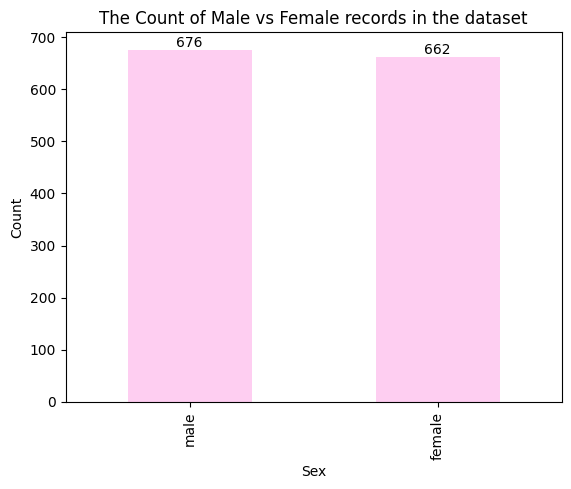

In [65]:
sex_and_charges = df[['sex', 'charges']]
sex_data = sex_and_charges['sex'].value_counts()
sex_plot = sex_data.plot.bar(x='sex', color=palette["Pink Lace"], title='The Count of Male vs Female records in the dataset', xlabel='Sex', ylabel='Count');
labels = sex_plot.bar_label(sex_plot.containers[0])

#### What's the average charge per sex?
This section aims to determine the average charge per sex.

##### Average charge for Females versus Males

In [66]:
female_charges_display = '$' + format(sex_and_charges.query("sex == 'female'")['charges'].mean(), '.2F')
male_charges_display = '$' + format(sex_and_charges.query("sex == 'male'")['charges'].mean(), '.2F')

metrics = [{'title': 'Female Charges', 'metric': female_charges_display}, {'title': 'Male Charges', 'metric': male_charges_display}]
display(HTML(metrics_html('Average Charge for Females vs Males', metrics)))

### Region and charges
This section explores the relationship between region and charges in the dataset.
#### Date Representation
This section aims to compare the number of records for each region.

Though the dataset has an almost equal split between region, the Southeast has the most records:
- There are 364 records for Southeast
- There are 325 records for Southwest
- There are 325 records for Northwest
- There are 324 record for Northeast
The bar chart below shows the count of records for each region.

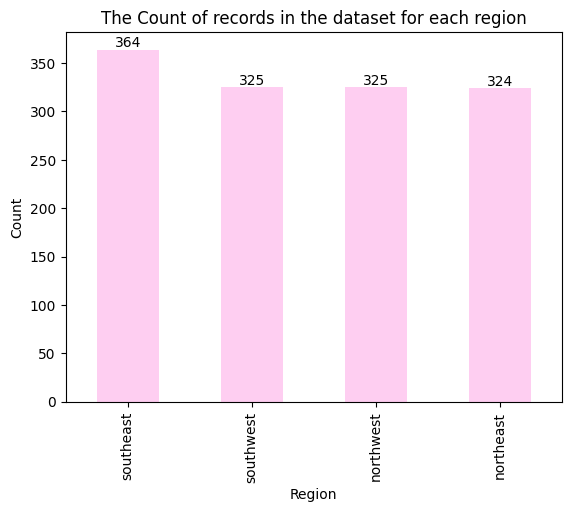

In [67]:
region_and_charges = df[['region', 'charges']]
region_data = region_and_charges['region'].value_counts()
region_plot = region_data.plot.bar(x='region', color=palette["Pink Lace"], title='The Count of records in the dataset for each region', xlabel='Region', ylabel='Count')
labels = region_plot.bar_label(region_plot.containers[0])


#### What's the average charge per region?
This section aims to determine the average charge per region.

##### Average charge per region


In [68]:
metrics = []
region_and_charges_means = region_and_charges.groupby('region').mean()

for row_index, row in region_and_charges_means.iterrows():
    metrics.append({'title': row_index.capitalize(), 'metric': '$' + format(row['charges'], '.2F')})
display(HTML(metrics_html('Average Charge per Region', metrics)))

### BMI and charges
This section explores the relationship between BMI and charges in the dataset.
#### Date Representation
This section aims to compare the number of records for each BMI.
The data set has:
- The least amount of records for the BMI interval of 50 to 55
- Tme most amount of records for the BMI interval of 30 to 35

The histogram chart below shows the count of records for each BMI interval.

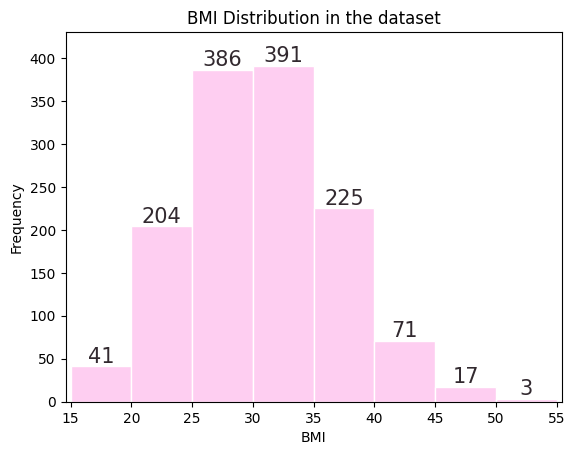

In [69]:
bmi_and_charges = df[['bmi', 'charges']]
values, bins, bars = plt.hist(df['bmi'], edgecolor='white', color=palette["Pink Lace"], bins=[15,20,25,30,35,40,45,50,55])
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.bar_label(bars, fontsize=15, color=palette["Black Coffee"])
plt.margins(x=0.01, y=0.1)
plt.title(label="BMI Distribution in the dataset")
plt.show()

#### What's the average charge per BMI interval?
This section aims to determine the average charge per BMI interval.

##### Average charge per BMI interval

In [71]:
bmi_and_charges.set_index('bmi')
bmi_as_bins = pd.cut(bmi_and_charges.index, bins=[15,20,25,30,35,40,45,50,55])
bmi_and_charges_means = bmi_and_charges.groupby(bmi_as_bins).mean()
bmi_and_charges_means['charges'] = bmi_and_charges_means['charges'].apply(lambda x: round(x, 2))
bmi_and_charges_means[['charges']]

,charges
"(15, 20]",14772.24
"(20, 25]",12638.73
"(25, 30]",20758.45
"(30, 35]",14695.22
"(35, 40]",21781.64
"(40, 45]",8849.19
"(45, 50]",12100.10
"(50, 55]",24089.37
